In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')

C:\Users\hp\AppData\Local\Temp\ipykernel_18068\4040101789.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')


In [6]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [9]:
df['TransactionMonth']=pd.to_datetime(df['TransactionMonth'])

In [11]:
numeric_cols=['TotalPremium','TotalClaims','CustomValueEstimate','CapitalOutstanding']
for col in numeric_cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [15]:
df['TotalClaims'] = df['TotalClaims'].apply(lambda x: x if x >= 0 else np.nan)
df['TotalPremium'] = df['TotalPremium'].apply(lambda x: x if x > 0 else np.nan)

In [16]:
df['LossRatio'] = np.where(
    df['TotalPremium'] > 0,
    df['TotalClaims'] / df['TotalPremium'],
    np.nan
)


In [17]:
# Identify rows with potential issues
issues = df[
    (df['TotalClaims'].isna()) |
    (df['TotalPremium'].isna()) |
    (df['LossRatio'].isna()) |
    (df['LossRatio'] > 3) 
]

print(f"Number of problematic rows: {len(issues)}")
issues.head()


Number of problematic rows: 384493


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,NaN,0.0,NaN
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,NaN,0.0,NaN
8,145247,12827,2015-08-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,NaN,0.0,NaN
11,145245,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,NaN,0.0,NaN
63,46217,4044,2014-09-01,False,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,NaN,0.0,NaN


In [21]:
df_valid = df[df['LossRatio'].notna()]

In [22]:
print(df_valid['LossRatio'].describe())


count    618174.000000
mean          0.350095
std           9.288613
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2553.600000
Name: LossRatio, dtype: float64


In [23]:
df_valid.describe()

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,CapitalOutstanding,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims,LossRatio
count,618174.000000,618174.000000,618174,618174.000000,6.179560e+05,618174.000000,617956.000000,617956.000000,617956.000000,617956.000000,1.561000e+05,617952.000000,0.0,6.181740e+05,618174.000000,618174.000000,618174.000000,618174.000000
mean,115066.592679,8728.583376,2015-03-05 19:07:54.821651968,2971.102169,5.535211e+07,2010.226244,4.044599,2487.076590,97.650783,4.013451,2.312563e+05,47997.362472,NaN,6.098280e+05,118.534206,100.201396,100.442212,0.350095
min,13.000000,14.000000,2013-10-01 00:00:00,1.000000,4.041640e+06,1987.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+04,-2.000000,NaN,1.000000e-02,0.000200,0.000011,0.000000,0.000000
25%,71591.000000,5184.000000,2015-01-01 00:00:00,742.000000,6.005692e+07,2008.000000,4.000000,2237.000000,75.000000,4.000000,1.356000e+05,0.000000,NaN,5.000000e+03,3.255100,2.631316,0.000000,0.000000
50%,111176.000000,7444.000000,2015-04-01 00:00:00,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,0.000000,NaN,7.500000e+03,8.436900,7.280746,0.000000,0.000000
75%,146853.000000,11988.000000,2015-06-01 00:00:00,4126.000000,6.005842e+07,2013.000000,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,0.000000,NaN,2.505000e+05,90.000000,78.947368,0.000000,0.000000
max,301175.000000,23246.000000,2015-08-01 00:00:00,9870.000000,6.506535e+07,2015.000000,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,700000.000000,NaN,1.263620e+07,74422.167900,65282.603421,393092.105263,2553.600000
std,64839.331221,5437.195158,NaN,2608.460587,1.294132e+07,3.270483,0.288604,394.827535,19.023018,0.452314,6.674016e+05,107535.366715,NaN,1.515213e+06,344.709285,286.235103,2989.936938,9.288613


In [27]:
df_valid.describe(include="object")

,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,...,CrossBorder,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
count,618174,618174,618174,618174,535638,587440,613103,613553,618174,618174,...,254,618174,618174,618174,618174,618174,618174,618174,618174,618174
unique,4,6,5,1,11,3,3,3,1,9,...,1,2,12,27,21,14,5,4,1,1
top,,Individual,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,...,No,Monthly,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
freq,559134,565293,578646,618174,170185,360875,610850,591066,618174,240781,...,254,617663,488851,64606,64616,509175,511979,576970,618174,618174


In [29]:
# Drop columns with only 1 unique value
cols_to_drop = ['Language', 'Country']
df_valid = df_valid.drop(columns=cols_to_drop)


In [28]:
cols_to_fill = ['Citizenship', 'Bank', 'AccountType', 'MaritalStatus', 'Gender']

# Fill NaN and empty strings with 'Unknown'
df_valid[cols_to_fill] = df_valid[cols_to_fill].fillna('Unknown')
df_valid[cols_to_fill] = df_valid[cols_to_fill].replace('', 'Unknown')


In [ ]:
value_counts = df_valid['LegalType'].value_counts()
rare_categories = value_counts[value_counts < 5000].index  # threshold for rarity
df_valid['LegalType'] = df_valid['LegalType'].replace(rare_categories, 'Other')


value_counts_title = df_valid['Title'].value_counts()
rare_titles = value_counts_title[value_counts_title < 5000].index
df_valid['Title'] = df_valid['Title'].replace(rare_titles, 'Other')


In [31]:
informative_cols = [
    'Province', 'CoverCategory', 'CoverType', 'CoverGroup', 
    'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]

df_informative = df[informative_cols + cols_to_fill + ['LegalType', 'Title']].copy()


In [32]:
df_informative.head()

,Province,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,Citizenship,Bank,AccountType,MaritalStatus,Gender,LegalType,Title
0,Gauteng,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,,First National Bank,Current account,Not specified,Not specified,Close Corporation,Mr
1,Gauteng,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,,First National Bank,Current account,Not specified,Not specified,Close Corporation,Mr
2,Gauteng,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,,First National Bank,Current account,Not specified,Not specified,Close Corporation,Mr
3,Gauteng,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,,First National Bank,Current account,Not specified,Not specified,Close Corporation,Mr
4,Gauteng,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,,First National Bank,Current account,Not specified,Not specified,Close Corporation,Mr


In [33]:
numeric_cols = df_valid.select_dtypes(include=[np.number]).columns.tolist()
print("numeric_cols", numeric_cols)

numeric_cols ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'CapitalOutstanding', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims', 'LossRatio']


In [34]:
numeric_cols = [
    'UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear',
    'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate',
    'CapitalOutstanding', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm',
    'TotalPremium', 'TotalClaims', 'LossRatio'
]

df_numeric = df_valid[numeric_cols].copy()


In [35]:
df_final = pd.concat([df_numeric, df_informative], axis=1)

In [36]:
print(df_final.shape)
print(df_final.head())
print(df_final.info())


(1000098, 32)
   UnderwrittenCoverID  PolicyID  PostalCode      mmcode  RegistrationYear  \
0             145249.0   12827.0      1459.0  44069150.0            2004.0   
1             145249.0   12827.0      1459.0  44069150.0            2004.0   
3             145255.0   12827.0      1459.0  44069150.0            2004.0   
5             145247.0   12827.0      1459.0  44069150.0            2004.0   
6             145247.0   12827.0      1459.0  44069150.0            2004.0   

   Cylinders  cubiccapacity  kilowatts  NumberOfDoors  CustomValueEstimate  \
0        6.0         2597.0      130.0            4.0             119300.0   
1        6.0         2597.0      130.0            4.0             119300.0   
3        6.0         2597.0      130.0            4.0             119300.0   
5        6.0         2597.0      130.0            4.0             119300.0   
6        6.0         2597.0      130.0            4.0             119300.0   

   ...                          Product  Statuto

In [37]:
df_final = df_final.drop(columns=['NumberOfVehiclesInFleet'])

In [38]:
numeric_cols_with_missing = ['CustomValueEstimate', 'CapitalOutstanding', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'mmcode']
for col in numeric_cols_with_missing:
    df_final[col] = df_final[col].fillna(df_final[col].median())


In [39]:
df_problematic = df_final[df_final['LossRatio'].isna() | (df_final['LossRatio'] > 3)]  # example threshold
df_final_clean = df_final.drop(df_problematic.index)

In [40]:
categorical_cols = df_final.select_dtypes(include='object').columns.tolist()
df_final_encoded = pd.get_dummies(df_final_clean, columns=categorical_cols, drop_first=True)

In [42]:
df_final_clean.isna().sum()

UnderwrittenCoverID         0
PolicyID                    0
PostalCode                  0
mmcode                      0
RegistrationYear            0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
NumberOfDoors               0
CustomValueEstimate         0
CapitalOutstanding          0
SumInsured                  0
CalculatedPremiumPerTerm    0
TotalPremium                0
TotalClaims                 0
LossRatio                   0
Province                    0
CoverCategory               0
CoverType                   0
CoverGroup                  0
Section                     0
Product                     0
StatutoryClass              0
StatutoryRiskType           0
Citizenship                 0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
LegalType                   0
Title                       0
dtype: int64

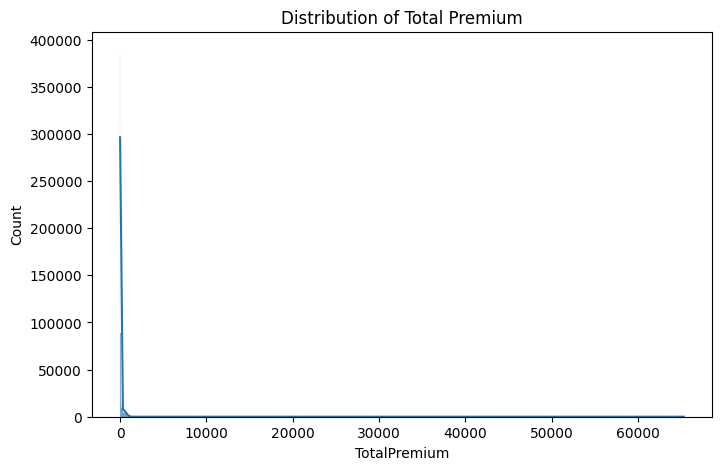

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df_final_clean["TotalPremium"], kde=True)
plt.title("Distribution of Total Premium")
plt.show()


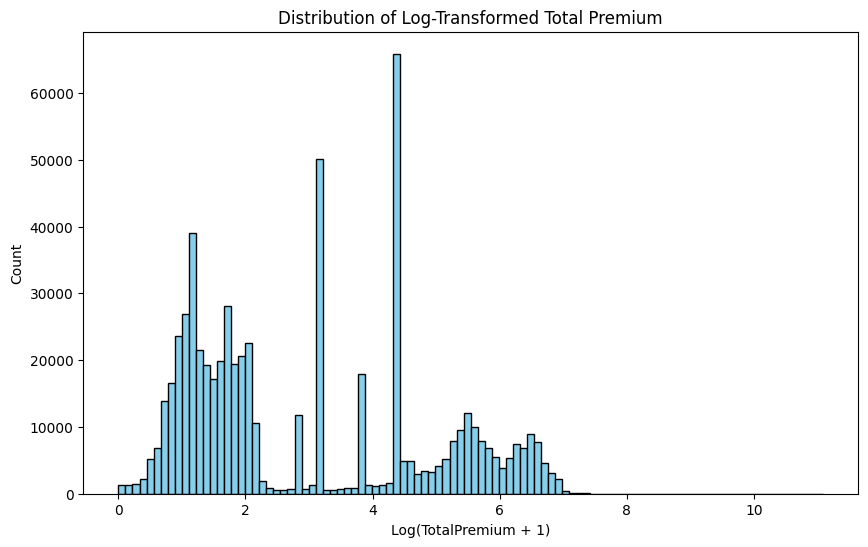

In [44]:
df_final['LogTotalPremium'] = np.log1p(df_final['TotalPremium'])

plt.figure(figsize=(10, 6))
plt.hist(df_final['LogTotalPremium'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-Transformed Total Premium')
plt.xlabel('Log(TotalPremium + 1)')
plt.ylabel('Count')
plt.show()
